# Exercício — Sono, hábitos, lifestyle, e indicadores de saúde
### Importação das bibliotecas e inicialização do dataframe

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('sleep_health_lifestyle.csv')

### Limpando as colunas, atualizando o dataframe

In [129]:
df = df[['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
    'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']]

### Inserindo valores na coluna Sleep Disorder e corrigindo BMI Category

In [130]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Normal'})

### Transformando campos textuais em números

In [131]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

le2 = LabelEncoder()
df['BMI Category'] = le2.fit_transform(df['BMI Category'])

le3 = LabelEncoder()
df['Sleep Disorder'] = le3.fit_transform(df['Sleep Disorder'])

### Analisando a contagem de pessoas por IMC

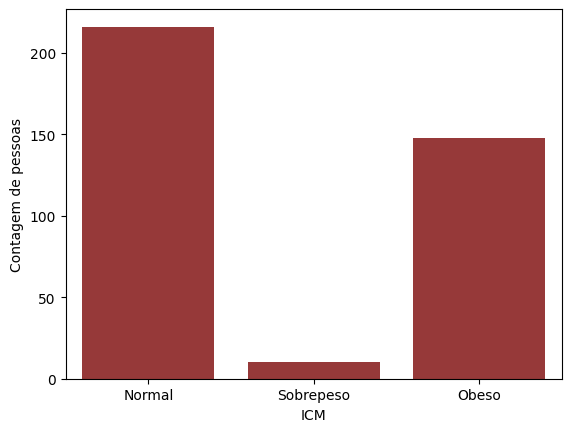

In [132]:
sns.countplot(data=df, x='BMI Category', color='brown')
plt.xticks([0, 1, 2], ['Normal', 'Sobrepeso', 'Obeso'])
plt.xlabel('ICM')
plt.ylabel('Contagem de pessoas')
plt.show()

### Scatter analisando a relação entre duração e qualidade do sono

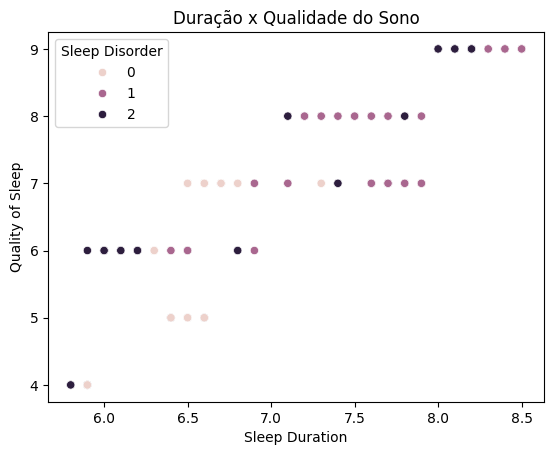

In [133]:
sns.scatterplot(data=df, x='Sleep Duration', y='Quality of Sleep', hue='Sleep Disorder')
plt.title('Duração x Qualidade do Sono')
plt.show()

### Heatmap para analisar a relação entre as features

<Axes: >

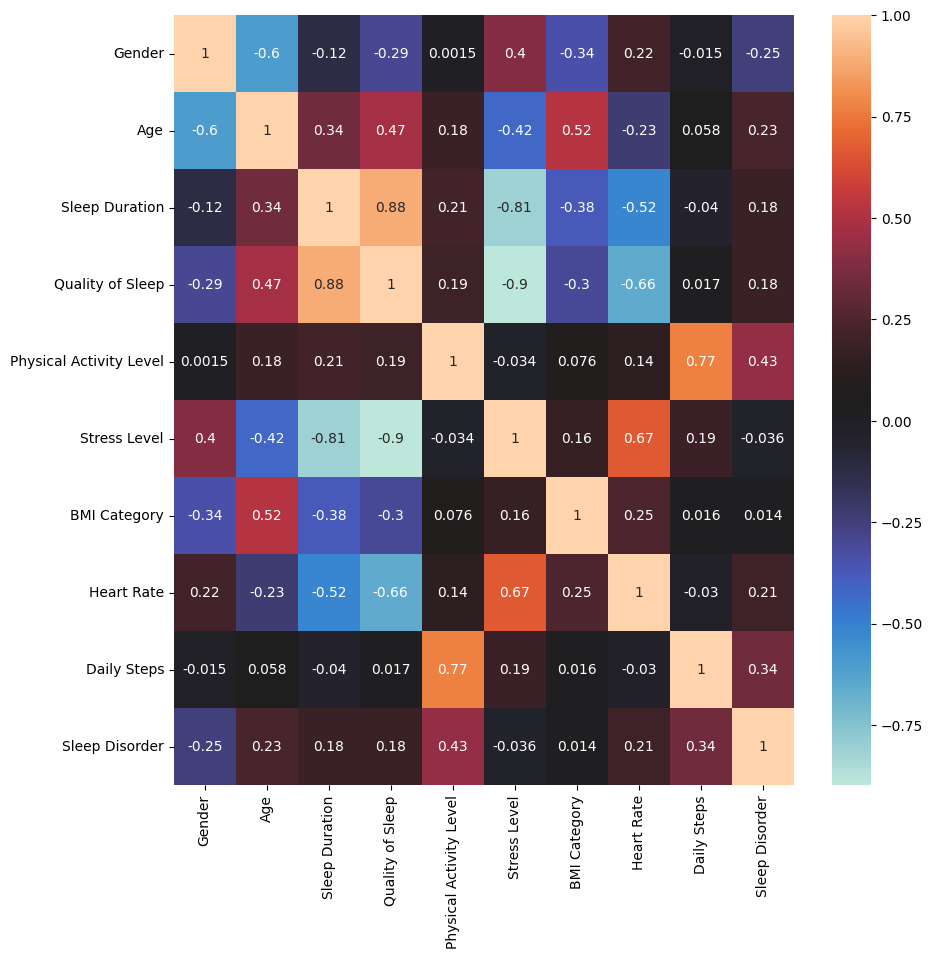

In [134]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='icefire')

### Scatter analisando a relação entre duração do sono e nível de estresse

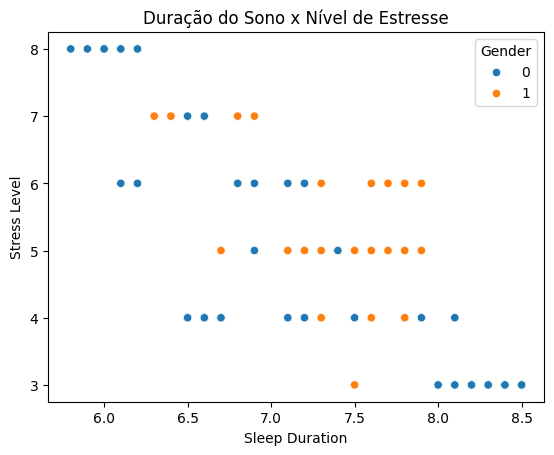

In [135]:
sns.scatterplot(data=df, x='Sleep Duration', y='Stress Level', hue='Gender')
plt.title('Duração do Sono x Nível de Estresse')
plt.show()

### Separando os dados para treinamento, para prever Stress Level

In [136]:
x_sleep = df.iloc[:, [0,1,2,3,4,6,7,8,9]].values
y_sleep = df.iloc[:, 5].values